<a href="https://colab.research.google.com/github/YM53858/DATA-690-WANG/blob/master/Assignment_07/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [ ]:
# <1> 
# Import libraries
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # To avoid warnings

In [ ]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

path = os.getcwd()
path

'C:\\Users\\saivi\\Desktop\\690 STATS&VIZ\\Assignment 7'

In [ ]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

clist = os.listdir("CollegeScorecard_Raw_Data/")
clist

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2018_19_PP.csv']

In [ ]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

clist[:] = [x for x in clist if x.startswith("MERGED")==True]

clist        

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2018_19_PP.csv']

In [ ]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

dfs = []

for i in clist:
    x = pd.read_csv(path+'\\CollegeScorecard_Raw_Data\\'+i,usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
    x['YEAR'] = i[6:10]
    dfs.append(x)
df = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
156214,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
156215,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
156216,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
156217,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


In [ ]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.describe()


,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.562190e+05,156218.000000,42874.000000,75173.000000
mean,9.011790e+05,4.552062,0.693456,11481.937331
std,4.428011e+06,2.190007,0.217268,9784.218804
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.627790e+05,3.000000,0.555100,3676.000000
50%,2.122670e+05,5.000000,0.717900,9150.000000
75%,4.060510e+05,6.000000,0.857325,15992.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156219 entries, 0 to 156218
Data columns (total 7 columns):
UNITID           156219 non-null int64
INSTNM           156219 non-null object
STABBR           156219 non-null object
REGION           156218 non-null float64
ADM_RATE         42874 non-null float64
TUITIONFEE_IN    75173 non-null float64
YEAR             156219 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 8.3+ MB


In [ ]:
df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [ ]:
df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
156214,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
156215,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
156216,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
156217,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
156218,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [ ]:
df.isna().sum() #missing  values

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         113345
TUITIONFEE_IN     81046
YEAR                  0
dtype: int64

In [ ]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC = df.loc[df["INSTNM"]=="University of Maryland-Baltimore County"]
UMBC = UMBC.reset_index().drop(columns=['index'])
UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
3,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
4,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
5,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
6,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
7,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
8,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
9,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [ ]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,22.0,22.0,17.000000,18.000000
mean,163268.0,2.0,0.642965,8865.222222
std,0.0,0.0,0.053436,1771.285195
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.596100,8145.000000
50%,163268.0,2.0,0.632700,8826.000000
75%,163268.0,2.0,0.689500,9992.000000
max,163268.0,2.0,0.717400,11778.000000


In [ ]:
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2151 to 150828
Data columns (total 7 columns):
UNITID           22 non-null int64
INSTNM           22 non-null object
STABBR           22 non-null object
REGION           22 non-null float64
ADM_RATE         17 non-null float64
TUITIONFEE_IN    18 non-null float64
YEAR             22 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [ ]:
UMBC.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [ ]:
UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [ ]:
UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
120503,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
128353,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
136064,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
143685,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
150828,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


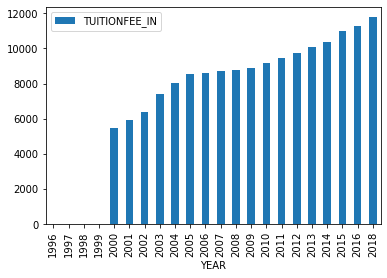

In [ ]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

UMBC[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot(kind='bar')

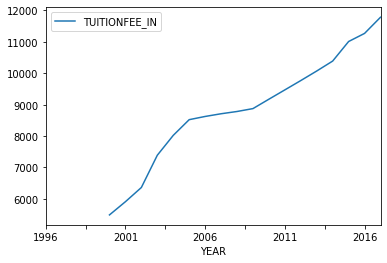

In [ ]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

UMBC[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot()

In [ ]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
tn_list=UMBC['TUITIONFEE_IN'].to_list()

In [ ]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

PCT_CHANGE=[]

for i in tn_list:PCT_CHANGE.append(0)
    
for i in range(len(UMBC)):
    if isinstance(tn_list[i], (float))&isinstance(tn_list[i-1], (float)):
        pc = ((tn_list[i]-(tn_list[i-1]))/(tn_list[i-1]))*100    
        PCT_CHANGE[i]=round(pc,2)
    else:
        pass
    
UMBC['PCT_CHANGE']=PCT_CHANGE

22

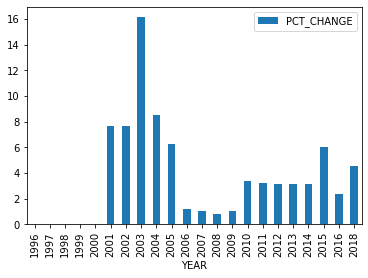

In [ ]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart
UMBC[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(kind='bar')

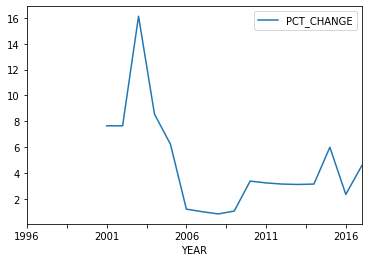

In [ ]:
UMBC[['PCT_CHANGE','YEAR']].set_index('YEAR').plot()

#### Alternate approach using pct_change()

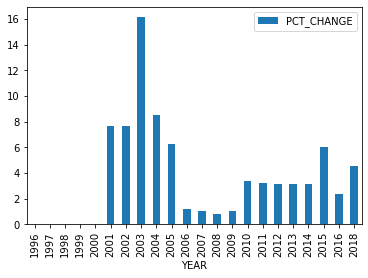

In [ ]:
UMBC['PCT_CHANGE'] = round((UMBC['TUITIONFEE_IN'].pct_change())*100,2)
UMBC[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(kind='bar')

In [ ]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def tuition_pct_change(tn_fee=[]):
    PC_CHANGE=[]
    for i in tn_fee:PC_CHANGE.append(0)
    
    for i in range(len(tn_fee)):
        if isinstance(tn_fee[i], (float))&isinstance(tn_fee[i-1], (float)):
            z = ((tn_fee[i]-(tn_fee[i-1]))/(tn_fee[i-1]))*100    
            PC_CHANGE[i]=round(z,2)
        else:
            pass
    PC_CHANGE
    return PC_CHANGE

In [ ]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU = df.loc[df["INSTNM"]=="Johns Hopkins University"]

22

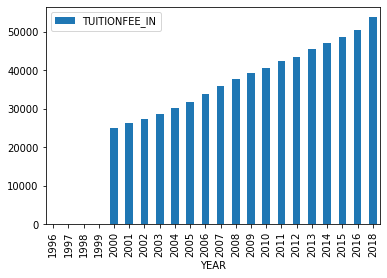

In [ ]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together


JHU[['TUITIONFEE_IN','YEAR']].set_index('YEAR').plot(kind='bar')

In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

jt_list=JHU['TUITIONFEE_IN'].to_list()

jhu_pct_change = tuition_pct_change(jt_list)

jhu_pct_change

[nan,
 nan,
 nan,
 nan,
 nan,
 5.13,
 4.5,
 4.89,
 4.91,
 4.91,
 7.21,
 5.9,
 5.01,
 3.85,
 3.91,
 3.93,
 2.63,
 4.79,
 3.5,
 3.51,
 3.49,
 6.61]

In [ ]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

JHU['PCT_CHANGE'] = jhu_pct_change

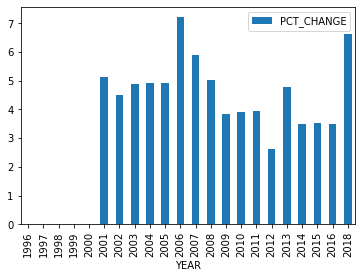

In [ ]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

JHU[['PCT_CHANGE','YEAR']].set_index('YEAR').plot(kind='bar')

In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

umbc2 = UMBC[['PCT_CHANGE','YEAR']]
umbc2 = umbc2.rename(columns={"PCT_CHANGE": "UMBC_PCT"})

In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

jhu2 = JHU[['PCT_CHANGE','YEAR']]
jhu2 = jhu2.rename(columns={"PCT_CHANGE": "JHU_PCT"})

In [ ]:
# Now, merger the two data frames
# and display the new dataframe
merged_df = pd.merge(umbc2, jhu2)

In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap. 

- It actually worked for me, I am not sure if I made anything wrong

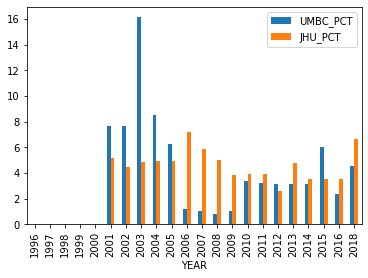

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

merged_df.set_index('YEAR').plot(kind="bar")

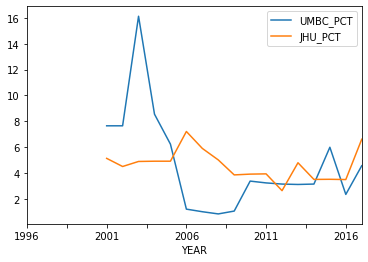

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

merged_df.set_index('YEAR').plot()

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### We can clearly see that in-state tuition fee have changed drastically in UMBC for years 2001-2005 with 2003 having the highest percentage change till 2019 and 2006-2009 with lowest increase.
#### JHU's in-state fee was increased by a regular amount from 2001-2005 and then a sudden increase in 2006. After 2006 it was increased with almost same amount till a sudden increase in 2018


In [ ]:
# The end.